In [1]:
using DataFrames
using DataStructures
using Plots
using Distributions
using Interpolations
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
hypos=range(0, 1, length=101)
pmf=pmf_from_seq(hypos)
data=(140, 250)
pmf = update_binomial(pmf, data);

In [3]:
cum = DataFrame(Index=values(pmf), cmf=[cdf(pmf, x) for x in values(pmf)]);

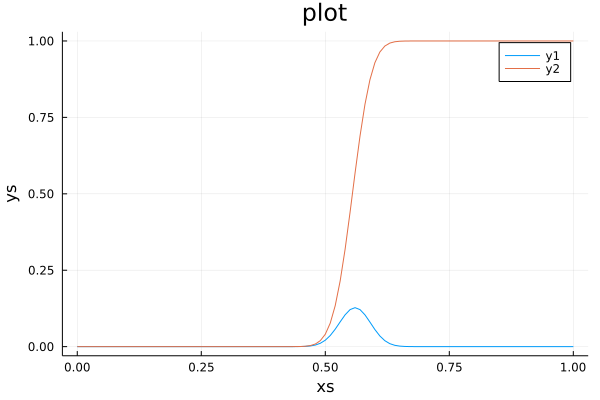

In [4]:
plot(pmf)
plot!(cum.Index, cum.cmf)

In [5]:
loc(cum, 0.61)

,Index,cmf
,Float64,Float64
62,0.61,0.96383


In [12]:
interp = LinearInterpolation(Interpolations.deduplicate_knots!(cum.cmf), cum.Index)
interp(0.96)

0.6089017054408619

In [13]:
interp 

101-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), Throw()) with element type Float64:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 ⋮
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0